In [267]:
import pandas as pd
import numpy as np
import time
from datetime import date
import math
import matplotlib.pyplot as plt
import datetime

In [175]:
df=pd.read_csv('final_table.csv')
df.head()

,time_identifier_day,time_identifier_hour,pickup_community_area,Number_rides,trip_start_timestamp,trip_end_timestamp,trip_seconds,payment_type,company,trip_miles,...,extras,trip_total,payment_types,companies,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,2016-01-03,6,2.0,2,2016-01-03 06:00:00 UTC,2016-01-03 06:15:00 UTC,360,Cash,NaN,1.0,...,0.0,6.25,Cash,NaN,42.001571,-87.695013,POINT (-87.6950125892 42.001571027),42.001571,-87.695013,POINT (-87.6950125892 42.001571027)
1,2016-01-03,6,49.0,1,2016-01-03 06:45:00 UTC,2016-01-03 06:45:00 UTC,420,Cash,Taxi Affiliation Services,1.5,...,0.0,7.25,Cash,Taxi Affiliation Services,41.706588,-87.623367,POINT (-87.6233665115 41.7065878819),41.706588,-87.623367,POINT (-87.6233665115 41.7065878819)
2,2016-01-03,6,22.0,3,2016-01-03 06:45:00 UTC,2016-01-03 06:45:00 UTC,480,Cash,KOAM Taxi Association,3.2,...,0.0,10.75,Cash,KOAM Taxi Association,41.922761,-87.699155,POINT (-87.6991553432 41.9227606205),41.924347,-87.734740,POINT (-87.7347397536 41.9243470769)
3,2016-01-03,6,3.0,11,2016-01-03 06:45:00 UTC,2016-01-03 07:00:00 UTC,540,Cash,NaN,2.7,...,0.0,9.00,Cash,NaN,41.965812,-87.655879,POINT (-87.6558787862 41.96581197),41.975171,-87.663518,POINT (-87.6634164054 41.9867117999)
4,2016-01-03,6,77.0,5,2016-01-03 06:45:00 UTC,2016-01-03 06:45:00 UTC,480,Credit Card,Taxi Affiliation Services,2.2,...,0.0,8.75,Credit Card,Taxi Affiliation Services,41.986712,-87.663416,POINT (-87.6634164054 41.9867117999),41.980264,-87.687516,POINT (-87.6875155152 41.9751709433)


In [176]:
df.shape

(1064792, 23)

In [40]:
def feature_extractor(timestamp):
    
    date1=timestamp.split()[0]
    time=timestamp.split()[1]
    
    hour=time.split(':')[0]
    minute=time.split(':')[1]
    
    hourfloat= (int(hour) + int(minute)/60)/24.0
    
    hourfloat_sin= math.sin(2*np.pi*hourfloat)
    hourfloat_cos= math.cos(2*np.pi*hourfloat)
    
    date2=date1.split('-')
    
    date3=date(int(date2[0]),int(date2[1]),int(date2[2]))
    day_str={0:'Monday',
             1:'Tuesday',
             2:'Wednesday',
             3:'Thursday',
             4:'Friday',
             5:'Saturday',
             6:'Sunday'}
    
    day_week= date3.weekday()
    day_cat=  day_str[day_week]
    
    day_num= (day_week + hourfloat)/7.0
    day_cos= math.cos(2*np.pi*day_num)
    day_sin= math.sin(2*np.pi*day_num)
    
    year=  date3.year
    month= date3.month
    day=   date3.day
    
    return [year, month, day, hourfloat, hourfloat_sin, hourfloat_cos, day_cat, day_num, day_cos, day_sin ]

In [46]:
timeseries=df['trip_start_timestamp'].map(feature_extractor).tolist()

In [59]:
type(timeseries[0][0])

int

In [120]:
names=['year', 'month', 'day', 'hourfloat', 'hourfloat_sin', 'hourfloat_cos', 'day_cat', 'day_num', 'day_cos', 'day_sin']

In [161]:
df_new=pd.DataFrame(timeseries,columns=names)

In [297]:
df_new.head()

,year,month,day,hourfloat,hourfloat_sin,hourfloat_cos,day_cat,day_num,day_cos,day_sin,Pickup_latitude,Pickup_longitude,Numberof_rides
0,2016,1,3,0.25000,1.000000,6.123234e-17,Sunday,0.892857,0.781831,-0.623490,42.001571,-87.695013,2
1,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.706588,-87.623367,1
2,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.922761,-87.699155,3
3,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.965812,-87.655879,11
4,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.986712,-87.663416,5


In [163]:
df_new.shape

(1064792, 10)

In [179]:
df_new['Pickup_latitude']=df['pickup_latitude']
df_new['Pickup_longitude']=df['pickup_longitude']
df_new['Numberof_rides']=df['Number_rides']
df_new.dropna(inplace=True)

In [180]:
df_new.head()

,year,month,day,hourfloat,hourfloat_sin,hourfloat_cos,day_cat,day_num,day_cos,day_sin,Pickup_latitude,Pickup_longitude,Numberof_rides
0,2016,1,3,0.25000,1.000000,6.123234e-17,Sunday,0.892857,0.781831,-0.623490,42.001571,-87.695013,2
1,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.706588,-87.623367,1
2,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.922761,-87.699155,3
3,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.965812,-87.655879,11
4,2016,1,3,0.28125,0.980785,-1.950903e-01,Sunday,0.897321,0.799010,-0.601317,41.986712,-87.663416,5


In [271]:
df_new.shape

(1030195, 13)

### Get training and test set

In [95]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error
import random

In [183]:
itrain, itest= train_test_split(range(df_new.shape[0]),train_size=0.8)
mask=np.ones(df_new.shape[0],dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
mask[:10]

array([ True,  True,  True,  True, False,  True,  True,  True,  True, False], dtype=bool)

In [184]:
# Getting our feature space
Xnames=['hourfloat','hourfloat_sin','hourfloat_cos','day_num','day_cos','day_sin','Pickup_latitude','Pickup_longitude']
X=df_new[Xnames]

#Getting the response
y=np.log10(df_new['Numberof_rides']+1)

In [185]:
X.head()

,hourfloat,hourfloat_sin,hourfloat_cos,day_num,day_cos,day_sin,Pickup_latitude,Pickup_longitude
0,0.25000,1.000000,6.123234e-17,0.892857,0.781831,-0.623490,42.001571,-87.695013
1,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.706588,-87.623367
2,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.922761,-87.699155
3,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.965812,-87.655879
4,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.986712,-87.663416


In [186]:
#getting training and test sets

Xtrain, Xtest, ytrain, ytest= X[mask],X[~mask],y[mask],y[~mask]

print('Shape of training data: ',Xtrain.shape)
print('Shape of tarining response: ',len(ytrain))
Xtrain.head()

Shape of training data:  (824156, 8)
Shape of tarining response:  824156


,hourfloat,hourfloat_sin,hourfloat_cos,day_num,day_cos,day_sin,Pickup_latitude,Pickup_longitude
0,0.25000,1.000000,6.123234e-17,0.892857,0.781831,-0.623490,42.001571,-87.695013
1,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.706588,-87.623367
2,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.922761,-87.699155
3,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.965812,-87.655879
5,0.28125,0.980785,-1.950903e-01,0.897321,0.799010,-0.601317,41.878594,-87.730232


In [187]:
# Creating a function for cross-validation over a grid of parameters

def cv_optimize(clf,parameters,X,y,n_folds=5,verbose=0,n_jobs=1,score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func, verbose=verbose)
    else:
        gs=GridSearchCV(clf,param_grid=parameters,cv=n_folds,verbose=verbose,n_jobs=n_jobs)
    gs.fit(X,y)
    print("Best",gs.best_params_,gs.best_score_,gs.grid_scores_,gs.scorer_)
    print("Best Score",gs.best_score_)
    best=gs.best_estimator_
    return best

### Random Forest Regression

In [188]:
estimator=RandomForestRegressor(n_estimators=20,n_jobs=-1)

#Defining a grid of parameters over which to optimize our random forest
parameters={"n_estimators":[50],
           "max_features":['auto'],
           "max_depth":[50]}
best=cv_optimize(estimator,parameters,Xtrain,ytrain,n_folds=5,score_func='mean_squared_error',verbose=3)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.036714 -  50.7s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   50.7s remaining:    0.0s
C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.052071 -  49.7s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s
C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.034009 -  48.7s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.036564 -  49.0s
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.028711 -  52.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.2min finished


Best {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50} -0.03761380137888347 [mean: -0.03761, std: 0.00779, params: {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 50}] make_scorer(mean_squared_error, greater_is_better=False)
Best Score -0.03761380137888347


### Evaluate the Results

In [189]:
# Fit the best random forest and evaluate R square for training and test sets
reg=best.fit(Xtrain,ytrain)
training_accuracy=reg.score(Xtrain,ytrain)
test_accuracy=reg.score(Xtest,ytest)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.9405
R^2 on test data:     0.9353


### Getting Most important Features

In [219]:
import operator
dict_feat_imp = dict(zip(list(X.columns.values),reg.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

[('Pickup_longitude', 0.60838358666768155),
 ('Pickup_latitude', 0.30477998225298997),
 ('hourfloat', 0.029780471545162734),
 ('day_sin', 0.018019917182751741),
 ('hourfloat_cos', 0.017297400166039242),
 ('hourfloat_sin', 0.012753288247428773),
 ('day_num', 0.0058653976925411369),
 ('day_cos', 0.0031199562454049053)]

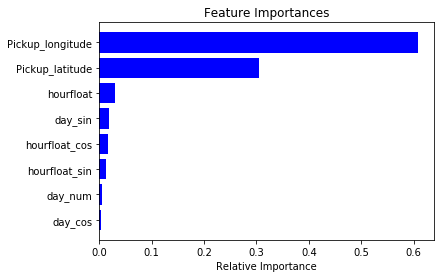

In [226]:
features=X.columns.values
importance=reg.feature_importances_
indices=np.argsort(importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

# Applying Random Forest on Specific Days

### Reading and Preparing weather data

In [337]:
weather_data=pd.read_csv('chicago_weather_data.csv')
weather_data.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,20130101,0.00,0.0,0.0,25,11,8.5
1,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,20130102,0.00,0.0,0.0,30,10,8.1
2,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,20130103,0.00,0.0,0.0,29,18,11.4
3,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,20130104,0.00,0.0,0.0,36,13,13.2
4,GHCND:USW00094846,CHICAGO OHARE INTERNATIONAL AIRPORT IL US,20130105,0.03,0.0,0.4,39,18,9.6


In [338]:
# Adding separate year, month and day column which will be extracted from the date column
def weather_date(date):
    year=math.floor(date/10000)
    month=math.floor(date%10000/100)
    day=date%100
    return [year,month,day]

In [339]:
weather_dateseries=weather_data['DATE'].map(weather_date).tolist()

In [340]:
weather_dateseries=pd.DataFrame(weather_dateseries,columns=['year','month','day'])

#Concatinating the weather_dataseries to the original weather dataframe
weather_data=pd.concat([weather_dateseries,weather_data],axis=1)
weather_data.drop(['STATION','STATION_NAME','DATE'],axis=1,inplace=True)
weather_data

,year,month,day,PRCP,SNWD,SNOW,TMAX,TMIN,AWND
0,2013,1,1,0.00,0.0,0.0,25,11,8.5
1,2013,1,2,0.00,0.0,0.0,30,10,8.1
2,2013,1,3,0.00,0.0,0.0,29,18,11.4
3,2013,1,4,0.00,0.0,0.0,36,13,13.2
4,2013,1,5,0.03,0.0,0.4,39,18,9.6
5,2013,1,6,0.00,0.0,0.0,36,18,11.9
6,2013,1,7,0.00,0.0,0.0,41,15,12.8
7,2013,1,8,0.00,0.0,0.0,44,22,9.6
8,2013,1,9,0.00,0.0,0.0,50,27,14.1
9,2013,1,10,0.63,0.0,0.0,45,22,8.5


### Preparing the dataset for machine learning

In [341]:
#Creating a function to get the number of day in the year. Ex. January 1 is 1 or December 31st is 365 or 366
def get_yearday(df):
    date=datetime.date(df['year'],df['month'],df['day'])
    return (date.timetuple().tm_yday-1)/365

#Join the weather data to taxi data and join some more date and time features
def data_prep(df):
    df=pd.merge(df,weather_data,how='left',on=['year','month','day'])
    df['yearfloat']  = df.apply(lambda x: get_yearday(x),axis=1)
    df['monthfloat'] = (df['day']-1)/30
    df['year_sin']   = (df['yearfloat']*2*math.pi).apply(math.sin)
    df['year_cos']   = (df['yearfloat']*2*math.pi).apply(math.cos)
    df['month_sin']  = (df['monthfloat'] * 2 * math.pi).apply(math.sin)
    df['month_cos']  = (df['monthfloat'] * 2 * math.pi).apply(math.cos)
    return df


In [342]:
df2=data_prep(df_new)

In [351]:
itrain, itest= train_test_split(range(df2.shape[0]),train_size=0.8)
mask=np.ones(df2.shape[0],dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
mask[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [353]:
# Creating response which will be logarithm of number of pickups. 
y=np.log10(df2['Numberof_rides'])
print('Shape of target: ',len(ytrain))

Shape of target:  1030195


In [352]:
# Extracting the features that we require from this dataframe
Xnames = ['month','day','Pickup_latitude','Pickup_longitude','yearfloat','year_cos','year_sin',
          'month_cos','month_sin','day_num','day_cos','day_sin',
          'hourfloat','hourfloat_cos','hourfloat_sin','TMAX','TMIN','AWND','SNOW','PRCP','SNWD']
X=df2[Xnames]
print('Shape of Predictor matrix: ',Xtrain.shape)
X.head()

Shape of Predictor matrix:  (1030195, 21)


,month,day,Pickup_latitude,Pickup_longitude,yearfloat,year_cos,year_sin,month_cos,month_sin,day_num,...,day_sin,hourfloat,hourfloat_cos,hourfloat_sin,TMAX,TMIN,AWND,SNOW,PRCP,SNWD
0,1,3,42.001571,-87.695013,0.005479,0.999407,0.034422,0.913545,0.406737,0.892857,...,-0.623490,0.25000,6.123234e-17,1.000000,29,22,11.6,0.0,0.0,1.2
1,1,3,41.706588,-87.623367,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
2,1,3,41.922761,-87.699155,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
3,1,3,41.965812,-87.655879,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
4,1,3,41.986712,-87.663416,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2


In [354]:
#getting training and test sets

Xtrain, Xtest, ytrain, ytest= X[mask],X[~mask],y[mask],y[~mask]

print('Shape of training data: ',Xtrain.shape)
print('Shape of tarining response: ',len(ytrain))
Xtrain.head()

Shape of training data:  (824156, 21)
Shape of tarining response:  824156


,month,day,Pickup_latitude,Pickup_longitude,yearfloat,year_cos,year_sin,month_cos,month_sin,day_num,...,day_sin,hourfloat,hourfloat_cos,hourfloat_sin,TMAX,TMIN,AWND,SNOW,PRCP,SNWD
0,1,3,42.001571,-87.695013,0.005479,0.999407,0.034422,0.913545,0.406737,0.892857,...,-0.623490,0.25000,6.123234e-17,1.000000,29,22,11.6,0.0,0.0,1.2
1,1,3,41.706588,-87.623367,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
2,1,3,41.922761,-87.699155,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
3,1,3,41.965812,-87.655879,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2
4,1,3,41.986712,-87.663416,0.005479,0.999407,0.034422,0.913545,0.406737,0.897321,...,-0.601317,0.28125,-1.950903e-01,0.980785,29,22,11.6,0.0,0.0,1.2


### Random Forest

In [355]:
#Creating a random forest regression estimator
reg=RandomForestRegressor(n_estimators=20, n_jobs=-1)

parameters = {"n_estimators": [1,2,5,10,20,50,100,200], "max_features": ["auto","sqrt","log2"],
              "max_depth": [1,2,5,10,20,50,100]} 

best = cv_optimize(reg, parameters, Xtrain, ytrain, n_folds=5, score_func='mean_squared_error', verbose=3)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] max_depth=1, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, n_estimators=1, score=-0.542100 -   0.7s
[CV] max_depth=1, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=1, max_features=auto, n_estimators=1, score=-0.550174 -   0.6s
[CV] max_depth=1, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=1, score=-0.559545 -   0.5s
[CV] max_depth=1, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=1, score=-0.567775 -   0.7s
[CV] max_depth=1, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=1, score=-0.563630 -   0.7s
[CV] max_depth=1, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=2, score=-0.542033 -   0.9s
[CV] max_depth=1, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=2, score=-0.550450 -   0.7s
[CV] max_depth=1, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=2, score=-0.559527 -   0.7s
[CV] max_depth=1, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=2, score=-0.567914 -   0.9s
[CV] max_depth=1, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=2, score=-0.563714 -   0.9s
[CV] max_depth=1, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=5, score=-0.542028 -   1.2s
[CV] max_depth=1, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=5, score=-0.550493 -   1.0s
[CV] max_depth=1, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=5, score=-0.559405 -   1.0s
[CV] max_depth=1, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=5, score=-0.567849 -   1.2s
[CV] max_depth=1, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=5, score=-0.563671 -   1.1s
[CV] max_depth=1, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=10, score=-0.542095 -   1.8s
[CV] max_depth=1, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=10, score=-0.550292 -   1.8s
[CV] max_depth=1, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=10, score=-0.559399 -   1.8s
[CV] max_depth=1, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=10, score=-0.567782 -   1.8s
[CV] max_depth=1, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=10, score=-0.563698 -   1.7s
[CV] max_depth=1, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=20, score=-0.542143 -   3.1s
[CV] max_depth=1, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=20, score=-0.550424 -   3.4s
[CV] max_depth=1, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=20, score=-0.559483 -   3.2s
[CV] max_depth=1, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=20, score=-0.567832 -   3.2s
[CV] max_depth=1, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=20, score=-0.563652 -   3.2s
[CV] max_depth=1, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=50, score=-0.542127 -   7.4s
[CV] max_depth=1, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=50, score=-0.550269 -   7.6s
[CV] max_depth=1, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=50, score=-0.559472 -   8.0s
[CV] max_depth=1, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=50, score=-0.567814 -   8.4s
[CV] max_depth=1, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=50, score=-0.563688 -   8.0s
[CV] max_depth=1, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=100, score=-0.542134 -  15.5s
[CV] max_depth=1, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=100, score=-0.550319 -  15.9s
[CV] max_depth=1, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=100, score=-0.559472 -  14.7s
[CV] max_depth=1, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=100, score=-0.567795 -  14.4s
[CV] max_depth=1, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=100, score=-0.563687 -  14.6s
[CV] max_depth=1, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=200, score=-0.542109 -  28.3s
[CV] max_depth=1, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=200, score=-0.550330 -  28.9s
[CV] max_depth=1, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=200, score=-0.559493 -  28.4s
[CV] max_depth=1, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=200, score=-0.567781 -  30.5s
[CV] max_depth=1, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=auto, n_estimators=200, score=-0.563682 -  28.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=1, score=-0.542084 -   0.4s
[CV] max_depth=1, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=1, score=-0.604866 -   0.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=1, score=-0.662319 -   0.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=1, score=-0.686517 -   0.4s
[CV] max_depth=1, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=1, score=-0.665866 -   0.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=2, score=-0.612031 -   0.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=2, score=-0.489487 -   0.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=2, score=-0.614505 -   0.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=2, score=-0.687310 -   0.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=2, score=-0.563673 -   0.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=5, score=-0.563974 -   0.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=5, score=-0.579922 -   0.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=5, score=-0.621164 -   0.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=5, score=-0.683773 -   0.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=5, score=-0.585480 -   0.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=10, score=-0.542990 -   0.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=10, score=-0.562179 -   0.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=10, score=-0.633049 -   0.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=10, score=-0.647249 -   0.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=10, score=-0.606083 -   0.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=20, score=-0.576816 -   1.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=20, score=-0.585487 -   1.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=20, score=-0.614527 -   1.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=20, score=-0.645961 -   1.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=20, score=-0.596832 -   1.3s
[CV] max_depth=1, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=50, score=-0.565635 -   2.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=50, score=-0.550070 -   2.7s
[CV] max_depth=1, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=50, score=-0.609159 -   2.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=50, score=-0.610032 -   2.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=50, score=-0.608573 -   2.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, score=-0.553334 -   4.9s
[CV] max_depth=1, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, score=-0.561044 -   5.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, score=-0.599278 -   6.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, score=-0.605728 -   5.5s
[CV] max_depth=1, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=100, score=-0.617382 -   5.0s
[CV] max_depth=1, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=200, score=-0.561097 -  10.1s
[CV] max_depth=1, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=200, score=-0.554356 -  10.2s
[CV] max_depth=1, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=200, score=-0.608872 -   9.8s
[CV] max_depth=1, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=200, score=-0.626846 -   9.6s
[CV] max_depth=1, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=sqrt, n_estimators=200, score=-0.616718 -   9.4s
[CV] max_depth=1, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=1, score=-0.618261 -   0.3s
[CV] max_depth=1, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=1, score=-0.524569 -   0.4s
[CV] max_depth=1, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=1, score=-0.667996 -   0.3s
[CV] max_depth=1, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=1, score=-0.680641 -   0.3s
[CV] max_depth=1, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=1, score=-0.665862 -   0.3s
[CV] max_depth=1, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=2, score=-0.616093 -   0.5s
[CV] max_depth=1, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=2, score=-0.546474 -   0.5s
[CV] max_depth=1, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=2, score=-0.668832 -   0.5s
[CV] max_depth=1, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=2, score=-0.602224 -   0.5s
[CV] max_depth=1, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=2, score=-0.664469 -   0.5s
[CV] max_depth=1, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=5, score=-0.535347 -   0.6s
[CV] max_depth=1, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=5, score=-0.521032 -   0.6s
[CV] max_depth=1, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=5, score=-0.660234 -   0.6s
[CV] max_depth=1, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=5, score=-0.636660 -   0.6s
[CV] max_depth=1, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=5, score=-0.551698 -   0.6s
[CV] max_depth=1, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=10, score=-0.574445 -   0.9s
[CV] max_depth=1, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=10, score=-0.578113 -   0.9s
[CV] max_depth=1, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=10, score=-0.584162 -   0.8s
[CV] max_depth=1, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=10, score=-0.615339 -   0.8s
[CV] max_depth=1, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=10, score=-0.615907 -   0.8s
[CV] max_depth=1, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=20, score=-0.560878 -   1.1s
[CV] max_depth=1, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=20, score=-0.578090 -   1.3s
[CV] max_depth=1, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=20, score=-0.597638 -   1.3s
[CV] max_depth=1, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=20, score=-0.643447 -   1.3s
[CV] max_depth=1, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=20, score=-0.635277 -   1.2s
[CV] max_depth=1, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=50, score=-0.569262 -   2.6s
[CV] max_depth=1, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=50, score=-0.560282 -   2.6s
[CV] max_depth=1, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=50, score=-0.599115 -   2.7s
[CV] max_depth=1, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=50, score=-0.616577 -   2.7s
[CV] max_depth=1, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=50, score=-0.600395 -   2.7s
[CV] max_depth=1, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=100, score=-0.572699 -   4.7s
[CV] max_depth=1, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=100, score=-0.559541 -   5.0s
[CV] max_depth=1, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=100, score=-0.598893 -   5.0s
[CV] max_depth=1, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=100, score=-0.614594 -   5.1s
[CV] max_depth=1, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=100, score=-0.608636 -   5.0s
[CV] max_depth=1, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=200, score=-0.561711 -   9.5s
[CV] max_depth=1, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=200, score=-0.558824 -   9.7s
[CV] max_depth=1, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=200, score=-0.599878 -   9.9s
[CV] max_depth=1, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=200, score=-0.636882 -  10.0s
[CV] max_depth=1, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=1, max_features=log2, n_estimators=200, score=-0.609784 -   9.8s
[CV] max_depth=2, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=1, score=-0.303014 -   1.0s
[CV] max_depth=2, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=1, score=-0.307497 -   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=1, score=-0.313060 -   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=1, score=-0.318704 -   0.9s
[CV] max_depth=2, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=1, score=-0.307167 -   1.0s
[CV] max_depth=2, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=2, score=-0.302869 -   1.2s
[CV] max_depth=2, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=2, score=-0.307968 -   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=2, score=-0.313021 -   1.2s
[CV] max_depth=2, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=2, score=-0.318976 -   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=2, score=-0.307126 -   1.1s
[CV] max_depth=2, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=5, score=-0.302926 -   1.7s
[CV] max_depth=2, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=5, score=-0.307725 -   1.8s
[CV] max_depth=2, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=5, score=-0.313094 -   1.8s
[CV] max_depth=2, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=5, score=-0.318994 -   1.8s
[CV] max_depth=2, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=5, score=-0.307120 -   1.7s
[CV] max_depth=2, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=10, score=-0.302987 -   3.6s
[CV] max_depth=2, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=10, score=-0.307743 -   3.5s
[CV] max_depth=2, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=10, score=-0.313097 -   3.5s
[CV] max_depth=2, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=10, score=-0.318862 -   3.5s
[CV] max_depth=2, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=10, score=-0.307126 -   3.5s
[CV] max_depth=2, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=20, score=-0.302897 -   6.0s
[CV] max_depth=2, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=20, score=-0.307710 -   6.2s
[CV] max_depth=2, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=20, score=-0.313112 -   6.0s
[CV] max_depth=2, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=20, score=-0.318942 -   6.2s
[CV] max_depth=2, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=20, score=-0.307116 -   6.3s
[CV] max_depth=2, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=50, score=-0.302919 -  14.8s
[CV] max_depth=2, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=50, score=-0.307688 -  14.7s
[CV] max_depth=2, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=50, score=-0.313100 -  15.0s
[CV] max_depth=2, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=50, score=-0.318883 -  15.0s
[CV] max_depth=2, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=50, score=-0.307123 -  14.6s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=100, score=-0.302939 -  28.8s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=100, score=-0.307724 -  32.4s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=100, score=-0.313113 -  29.3s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=100, score=-0.318878 -  29.0s
[CV] max_depth=2, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=100, score=-0.307121 -  29.0s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=200, score=-0.302942 -  57.8s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=200, score=-0.307726 -  59.8s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=200, score=-0.313090 -  58.5s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=200, score=-0.318901 -  56.9s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=auto, n_estimators=200, score=-0.307107 -  58.0s
[CV] max_depth=2, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=1, score=-0.615393 -   0.5s
[CV] max_depth=2, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=1, score=-0.550335 -   0.5s
[CV] max_depth=2, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=1, score=-0.605025 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=1, score=-0.462081 -   0.5s
[CV] max_depth=2, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=1, score=-0.560379 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=2, score=-0.519951 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=2, score=-0.545017 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=2, score=-0.581659 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=2, score=-0.675610 -   0.5s
[CV] max_depth=2, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=2, score=-0.405561 -   0.6s
[CV] max_depth=2, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=5, score=-0.569011 -   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=5, score=-0.519558 -   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=5, score=-0.447067 -   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=5, score=-0.484092 -   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=5, score=-0.462506 -   0.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=10, score=-0.509311 -   1.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=10, score=-0.532203 -   1.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=10, score=-0.441964 -   1.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=10, score=-0.515500 -   1.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=10, score=-0.528437 -   1.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=20, score=-0.472225 -   1.9s
[CV] max_depth=2, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=20, score=-0.474867 -   1.8s
[CV] max_depth=2, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=20, score=-0.530421 -   1.9s
[CV] max_depth=2, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=20, score=-0.560442 -   1.9s
[CV] max_depth=2, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=20, score=-0.522571 -   1.9s
[CV] max_depth=2, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=50, score=-0.504535 -   4.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=50, score=-0.441783 -   4.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=50, score=-0.499798 -   4.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=50, score=-0.532723 -   4.3s
[CV] max_depth=2, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=50, score=-0.534077 -   4.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=-0.481860 -   7.8s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=-0.470962 -   7.9s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=-0.526273 -   7.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=-0.536295 -   7.7s
[CV] max_depth=2, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=100, score=-0.505321 -   7.8s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=200, score=-0.480775 -  15.1s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=200, score=-0.484535 -  15.4s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=200, score=-0.522959 -  15.5s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=200, score=-0.533695 -  15.4s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=sqrt, n_estimators=200, score=-0.517287 -  15.1s
[CV] max_depth=2, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=1, score=-0.526162 -   0.4s
[CV] max_depth=2, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=1, score=-0.603894 -   0.4s
[CV] max_depth=2, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=1, score=-0.562247 -   0.4s
[CV] max_depth=2, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=1, score=-0.507568 -   0.5s
[CV] max_depth=2, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=1, score=-0.670323 -   0.4s
[CV] max_depth=2, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=2, score=-0.505800 -   0.6s
[CV] max_depth=2, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=2, score=-0.539510 -   0.6s
[CV] max_depth=2, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=2, score=-0.585477 -   0.5s
[CV] max_depth=2, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=2, score=-0.615529 -   0.6s
[CV] max_depth=2, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=2, score=-0.555587 -   0.6s
[CV] max_depth=2, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=5, score=-0.527266 -   0.7s
[CV] max_depth=2, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=5, score=-0.415085 -   0.9s
[CV] max_depth=2, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=5, score=-0.465574 -   0.7s
[CV] max_depth=2, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=5, score=-0.590424 -   0.7s
[CV] max_depth=2, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=5, score=-0.663643 -   0.7s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=10, score=-0.477838 -   1.2s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=10, score=-0.525222 -   1.3s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=10, score=-0.598855 -   1.0s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=10, score=-0.568659 -   1.2s
[CV] max_depth=2, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=10, score=-0.570578 -   1.1s
[CV] max_depth=2, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=20, score=-0.519603 -   1.7s
[CV] max_depth=2, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=20, score=-0.460071 -   1.8s
[CV] max_depth=2, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=20, score=-0.545081 -   1.8s
[CV] max_depth=2, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=20, score=-0.584196 -   1.7s
[CV] max_depth=2, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=20, score=-0.526933 -   1.8s
[CV] max_depth=2, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=50, score=-0.463848 -   4.0s
[CV] max_depth=2, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=50, score=-0.473060 -   4.1s
[CV] max_depth=2, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=50, score=-0.518472 -   4.0s
[CV] max_depth=2, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=50, score=-0.557288 -   3.9s
[CV] max_depth=2, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=50, score=-0.536893 -   3.9s
[CV] max_depth=2, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=100, score=-0.478442 -   7.8s
[CV] max_depth=2, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=100, score=-0.513412 -   7.7s
[CV] max_depth=2, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=100, score=-0.549910 -   7.7s
[CV] max_depth=2, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=100, score=-0.529488 -   8.0s
[CV] max_depth=2, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=100, score=-0.516861 -   7.7s
[CV] max_depth=2, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=200, score=-0.477170 -  15.3s
[CV] max_depth=2, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=200, score=-0.482477 -  15.2s
[CV] max_depth=2, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=200, score=-0.527097 -  15.3s
[CV] max_depth=2, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=200, score=-0.561421 -  15.0s
[CV] max_depth=2, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=2, max_features=log2, n_estimators=200, score=-0.534955 -  15.1s
[CV] max_depth=5, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=1, score=-0.111358 -   2.0s
[CV] max_depth=5, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=1, score=-0.127956 -   2.0s
[CV] max_depth=5, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=1, score=-0.113356 -   2.0s
[CV] max_depth=5, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=1, score=-0.112794 -   2.0s
[CV] max_depth=5, max_features=auto, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=1, score=-0.097963 -   2.1s
[CV] max_depth=5, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=2, score=-0.111400 -   3.0s
[CV] max_depth=5, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=2, score=-0.128229 -   2.5s
[CV] max_depth=5, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=2, score=-0.113410 -   2.5s
[CV] max_depth=5, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=2, score=-0.111598 -   2.4s
[CV] max_depth=5, max_features=auto, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=2, score=-0.097938 -   2.6s
[CV] max_depth=5, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=5, score=-0.111442 -   4.1s
[CV] max_depth=5, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=5, score=-0.127995 -   4.4s
[CV] max_depth=5, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=5, score=-0.113014 -   4.0s
[CV] max_depth=5, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=5, score=-0.111957 -   4.1s
[CV] max_depth=5, max_features=auto, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=5, score=-0.097856 -   4.0s
[CV] max_depth=5, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=10, score=-0.111370 -   8.4s
[CV] max_depth=5, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=10, score=-0.127913 -   8.3s
[CV] max_depth=5, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=10, score=-0.112895 -   8.2s
[CV] max_depth=5, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=10, score=-0.111733 -   8.1s
[CV] max_depth=5, max_features=auto, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=10, score=-0.097899 -   8.2s
[CV] max_depth=5, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=20, score=-0.111329 -  14.8s
[CV] max_depth=5, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=20, score=-0.128037 -  14.9s
[CV] max_depth=5, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=20, score=-0.112673 -  14.8s
[CV] max_depth=5, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=20, score=-0.111842 -  14.8s
[CV] max_depth=5, max_features=auto, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=20, score=-0.097927 -  14.8s
[CV] max_depth=5, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=50, score=-0.111307 -  37.6s
[CV] max_depth=5, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=50, score=-0.127936 -  39.5s
[CV] max_depth=5, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=50, score=-0.112640 -  37.8s
[CV] max_depth=5, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=50, score=-0.111840 -  37.3s
[CV] max_depth=5, max_features=auto, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=50, score=-0.097883 -  37.6s
[CV] max_depth=5, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=100, score=-0.111294 - 1.2min
[CV] max_depth=5, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=100, score=-0.127909 - 1.2min
[CV] max_depth=5, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=100, score=-0.112677 - 1.2min
[CV] max_depth=5, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=100, score=-0.111865 - 1.2min
[CV] max_depth=5, max_features=auto, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=100, score=-0.097871 - 1.2min
[CV] max_depth=5, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=200, score=-0.111340 - 2.4min
[CV] max_depth=5, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=200, score=-0.127907 - 2.4min
[CV] max_depth=5, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=200, score=-0.112718 - 2.3min
[CV] max_depth=5, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=200, score=-0.111841 - 2.4min
[CV] max_depth=5, max_features=auto, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=auto, n_estimators=200, score=-0.097883 - 2.4min
[CV] max_depth=5, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=1, score=-0.367816 -   0.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=1, score=-0.284537 -   0.7s
[CV] max_depth=5, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=1, score=-0.386549 -   0.7s
[CV] max_depth=5, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=1, score=-0.481975 -   0.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=1, score=-0.397233 -   0.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=2, score=-0.356893 -   0.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=2, score=-0.389315 -   0.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=2, score=-0.285955 -   0.9s
[CV] max_depth=5, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=2, score=-0.384467 -   0.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=2, score=-0.322205 -   0.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=5, score=-0.267613 -   1.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=5, score=-0.236143 -   1.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=5, score=-0.387211 -   1.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=5, score=-0.341017 -   1.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=5, score=-0.499718 -   1.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=10, score=-0.294007 -   2.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=10, score=-0.243418 -   2.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=10, score=-0.370324 -   2.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=10, score=-0.353358 -   2.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=10, score=-0.288191 -   2.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=20, score=-0.286766 -   3.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=20, score=-0.241143 -   3.7s
[CV] max_depth=5, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=20, score=-0.327018 -   3.7s
[CV] max_depth=5, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=20, score=-0.367704 -   3.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=20, score=-0.311207 -   3.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=50, score=-0.265519 -   7.8s
[CV] max_depth=5, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=50, score=-0.269317 -   8.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=50, score=-0.294888 -   8.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=50, score=-0.330540 -   8.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=50, score=-0.319729 -   7.9s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=-0.287723 -  15.1s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=-0.288955 -  15.0s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=-0.310826 -  15.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=-0.323340 -  15.4s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=-0.351942 -  14.9s
[CV] max_depth=5, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=200, score=-0.280291 -  30.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=200, score=-0.290106 -  29.5s
[CV] max_depth=5, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=200, score=-0.316516 -  30.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=200, score=-0.338143 -  30.6s
[CV] max_depth=5, max_features=sqrt, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=sqrt, n_estimators=200, score=-0.312484 -  30.4s
[CV] max_depth=5, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=1, score=-0.548616 -   0.5s
[CV] max_depth=5, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=1, score=-0.342116 -   0.6s
[CV] max_depth=5, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=1, score=-0.563583 -   0.6s
[CV] max_depth=5, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=1, score=-0.259299 -   0.7s
[CV] max_depth=5, max_features=log2, n_estimators=1 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=1, score=-0.486665 -   0.6s
[CV] max_depth=5, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=2, score=-0.376967 -   0.7s
[CV] max_depth=5, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=2, score=-0.299470 -   0.8s
[CV] max_depth=5, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=2, score=-0.304709 -   0.8s
[CV] max_depth=5, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=2, score=-0.304569 -   0.8s
[CV] max_depth=5, max_features=log2, n_estimators=2 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=2, score=-0.367214 -   0.8s
[CV] max_depth=5, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=5, score=-0.261521 -   1.1s
[CV] max_depth=5, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=5, score=-0.386523 -   1.2s
[CV] max_depth=5, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=5, score=-0.250854 -   1.2s
[CV] max_depth=5, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=5, score=-0.428404 -   1.1s
[CV] max_depth=5, max_features=log2, n_estimators=5 ..................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=5, score=-0.286151 -   1.1s
[CV] max_depth=5, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=10, score=-0.341927 -   2.0s
[CV] max_depth=5, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=10, score=-0.324687 -   1.9s
[CV] max_depth=5, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=10, score=-0.363889 -   2.0s
[CV] max_depth=5, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=10, score=-0.317339 -   2.0s
[CV] max_depth=5, max_features=log2, n_estimators=10 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=10, score=-0.313709 -   1.9s
[CV] max_depth=5, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=20, score=-0.245631 -   3.5s
[CV] max_depth=5, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=20, score=-0.262781 -   3.4s
[CV] max_depth=5, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=20, score=-0.305994 -   3.5s
[CV] max_depth=5, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=20, score=-0.408649 -   3.3s
[CV] max_depth=5, max_features=log2, n_estimators=20 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=20, score=-0.294219 -   3.3s
[CV] max_depth=5, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=50, score=-0.286955 -   7.7s
[CV] max_depth=5, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=50, score=-0.284695 -   7.8s
[CV] max_depth=5, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=50, score=-0.343612 -   7.8s
[CV] max_depth=5, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=50, score=-0.347685 -   7.9s
[CV] max_depth=5, max_features=log2, n_estimators=50 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=50, score=-0.307310 -   7.9s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=100, score=-0.302204 -  14.7s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=100, score=-0.279906 -  15.3s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=100, score=-0.328327 -  14.8s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=100, score=-0.324840 -  15.1s
[CV] max_depth=5, max_features=log2, n_estimators=100 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=100, score=-0.345448 -  14.7s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=200, score=-0.296356 -  29.9s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=200, score=-0.274771 -  31.1s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=200, score=-0.313259 -  30.4s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=200, score=-0.326698 -  30.4s
[CV] max_depth=5, max_features=log2, n_estimators=200 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=5, max_features=log2, n_estimators=200, score=-0.316974 -  52.6s
[CV] max_depth=10, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=1, score=-0.078183 -   7.5s
[CV] max_depth=10, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=1, score=-0.091676 -   4.8s
[CV] max_depth=10, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=1, score=-0.061609 -   3.8s
[CV] max_depth=10, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=1, score=-0.067049 -   4.2s
[CV] max_depth=10, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=1, score=-0.051110 -   4.2s
[CV] max_depth=10, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=2, score=-0.076319 -   4.7s
[CV] max_depth=10, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=2, score=-0.090566 -   5.2s
[CV] max_depth=10, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=2, score=-0.059950 -   5.8s
[CV] max_depth=10, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=2, score=-0.065485 -   4.5s
[CV] max_depth=10, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=2, score=-0.050194 -   4.4s
[CV] max_depth=10, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=5, score=-0.075935 -   7.8s
[CV] max_depth=10, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=5, score=-0.089941 -   7.3s
[CV] max_depth=10, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=5, score=-0.059187 -   8.3s
[CV] max_depth=10, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=5, score=-0.065288 -   7.3s
[CV] max_depth=10, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=5, score=-0.049853 -   7.0s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=10, score=-0.075379 -  14.5s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=10, score=-0.089921 -  14.9s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=10, score=-0.059153 -  14.5s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=10, score=-0.064896 -  14.6s
[CV] max_depth=10, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=10, score=-0.049527 -  14.8s
[CV] max_depth=10, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=20, score=-0.075367 -  26.3s
[CV] max_depth=10, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=20, score=-0.089806 -  30.6s
[CV] max_depth=10, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=20, score=-0.058952 -  35.1s
[CV] max_depth=10, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=20, score=-0.064750 -  32.8s
[CV] max_depth=10, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=20, score=-0.049591 -  35.2s
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=-0.075365 - 1.4min
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=-0.089638 - 1.4min
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=-0.058883 - 1.3min
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=-0.064628 - 1.4min
[CV] max_depth=10, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=50, score=-0.049556 - 1.4min
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=-0.075328 - 2.7min
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=-0.089572 - 2.7min
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=-0.058878 - 2.4min
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=-0.064668 - 2.2min
[CV] max_depth=10, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=100, score=-0.049518 - 2.2min
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=200, score=-0.075332 - 4.5min
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=200, score=-0.089574 - 4.5min
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=200, score=-0.058897 - 4.5min
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=200, score=-0.064639 - 4.5min
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=auto, n_estimators=200, score=-0.049577 - 4.8min
[CV] max_depth=10, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=1, score=-0.209669 -   1.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=1, score=-0.157445 -   1.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=1, score=-0.168566 -   1.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=1, score=-0.387149 -   1.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=1, score=-0.132537 -   1.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=2, score=-0.133708 -   1.6s
[CV] max_depth=10, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=2, score=-0.191686 -   1.5s
[CV] max_depth=10, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=2, score=-0.152179 -   1.7s
[CV] max_depth=10, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=2, score=-0.165209 -   1.4s
[CV] max_depth=10, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=2, score=-0.281389 -   1.4s
[CV] max_depth=10, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=5, score=-0.171021 -   2.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=5, score=-0.164377 -   2.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=5, score=-0.157023 -   2.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=5, score=-0.186072 -   1.8s
[CV] max_depth=10, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=5, score=-0.155328 -   2.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=10, score=-0.110608 -   3.6s
[CV] max_depth=10, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=10, score=-0.140529 -   3.3s
[CV] max_depth=10, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=10, score=-0.138547 -   3.1s
[CV] max_depth=10, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=10, score=-0.199726 -   2.8s
[CV] max_depth=10, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=10, score=-0.131202 -   3.5s
[CV] max_depth=10, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=20, score=-0.141726 -   6.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=20, score=-0.124774 -   6.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=20, score=-0.148601 -   6.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=20, score=-0.154000 -   5.6s
[CV] max_depth=10, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=20, score=-0.137117 -   6.7s
[CV] max_depth=10, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=50, score=-0.121146 -  16.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=50, score=-0.111449 -  16.3s
[CV] max_depth=10, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=50, score=-0.147754 -  16.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=50, score=-0.158234 -  16.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=50, score=-0.126512 -  15.3s
[CV] max_depth=10, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=100, score=-0.117264 -  30.5s
[CV] max_depth=10, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=100, score=-0.125450 -  26.9s
[CV] max_depth=10, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=100, score=-0.130045 -  27.2s
[CV] max_depth=10, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=100, score=-0.141933 -  30.7s
[CV] max_depth=10, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=100, score=-0.128977 -  30.4s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=200, score=-0.112878 - 1.1min
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=200, score=-0.115121 -  57.0s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=200, score=-0.130785 -  52.8s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=200, score=-0.144508 -  56.8s
[CV] max_depth=10, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=sqrt, n_estimators=200, score=-0.127205 - 1.0min
[CV] max_depth=10, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=1, score=-0.182431 -   1.3s
[CV] max_depth=10, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=1, score=-0.300061 -   1.4s
[CV] max_depth=10, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=1, score=-0.158430 -   1.4s
[CV] max_depth=10, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=1, score=-0.108658 -   1.6s
[CV] max_depth=10, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=1, score=-0.153437 -   1.4s
[CV] max_depth=10, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=2, score=-0.213184 -   1.7s
[CV] max_depth=10, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=2, score=-0.158643 -   1.3s
[CV] max_depth=10, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=2, score=-0.142358 -   1.1s
[CV] max_depth=10, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=2, score=-0.161484 -   1.1s
[CV] max_depth=10, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=2, score=-0.204191 -   1.1s
[CV] max_depth=10, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=5, score=-0.118049 -   1.7s
[CV] max_depth=10, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=5, score=-0.128845 -   1.8s
[CV] max_depth=10, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=5, score=-0.138976 -   1.8s
[CV] max_depth=10, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=5, score=-0.158792 -   1.9s
[CV] max_depth=10, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=5, score=-0.122588 -   1.8s
[CV] max_depth=10, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=10, score=-0.114322 -   3.3s
[CV] max_depth=10, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=10, score=-0.130641 -   4.5s
[CV] max_depth=10, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=10, score=-0.142381 -   4.9s
[CV] max_depth=10, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=10, score=-0.165508 -   3.0s
[CV] max_depth=10, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=10, score=-0.143990 -   3.3s
[CV] max_depth=10, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=20, score=-0.132842 -   5.6s
[CV] max_depth=10, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=20, score=-0.136909 -   5.5s
[CV] max_depth=10, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=20, score=-0.136366 -   6.1s
[CV] max_depth=10, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=20, score=-0.147494 -   7.2s
[CV] max_depth=10, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=20, score=-0.116502 -   8.2s
[CV] max_depth=10, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=50, score=-0.115400 -  16.9s
[CV] max_depth=10, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=50, score=-0.127649 -  18.2s
[CV] max_depth=10, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=50, score=-0.123665 -  15.8s
[CV] max_depth=10, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=50, score=-0.149625 -  17.4s
[CV] max_depth=10, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=50, score=-0.126747 -  18.9s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=100, score=-0.115268 -  29.2s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=100, score=-0.120438 -  28.0s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=100, score=-0.132166 -  33.3s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=100, score=-0.151020 -  28.3s
[CV] max_depth=10, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=100, score=-0.129945 -  32.1s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=200, score=-0.115020 -  55.2s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=200, score=-0.120953 -  53.2s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=200, score=-0.135502 -  57.1s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=200, score=-0.144943 -  59.3s
[CV] max_depth=10, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=10, max_features=log2, n_estimators=200, score=-0.123934 - 1.0min
[CV] max_depth=20, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=1, score=-0.100630 -   8.5s
[CV] max_depth=20, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=1, score=-0.114884 -   7.3s
[CV] max_depth=20, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=1, score=-0.077939 -   8.7s
[CV] max_depth=20, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=1, score=-0.084483 -   8.1s
[CV] max_depth=20, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=1, score=-0.068550 -   7.4s
[CV] max_depth=20, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=2, score=-0.090586 -   8.5s
[CV] max_depth=20, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=2, score=-0.103993 -   9.1s
[CV] max_depth=20, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=2, score=-0.064764 -   8.4s
[CV] max_depth=20, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=2, score=-0.073032 -   9.4s
[CV] max_depth=20, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=2, score=-0.055667 -   8.7s
[CV] max_depth=20, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=5, score=-0.084149 -  13.7s
[CV] max_depth=20, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=5, score=-0.097364 -  13.3s
[CV] max_depth=20, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=5, score=-0.057359 -  13.6s
[CV] max_depth=20, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=5, score=-0.066270 -  13.3s
[CV] max_depth=20, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=5, score=-0.048534 -  13.7s
[CV] max_depth=20, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=10, score=-0.081767 -  29.9s
[CV] max_depth=20, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=10, score=-0.095224 -  25.8s
[CV] max_depth=20, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=10, score=-0.054628 -  24.0s
[CV] max_depth=20, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=10, score=-0.064013 -  25.4s
[CV] max_depth=20, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=10, score=-0.045865 -  24.3s
[CV] max_depth=20, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=20, score=-0.081247 -  50.5s
[CV] max_depth=20, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=20, score=-0.094536 -  57.4s
[CV] max_depth=20, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=20, score=-0.053500 -  53.4s
[CV] max_depth=20, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=20, score=-0.062790 -  51.2s
[CV] max_depth=20, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=20, score=-0.044805 -  53.2s
[CV] max_depth=20, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=50, score=-0.080478 - 2.3min
[CV] max_depth=20, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=50, score=-0.093807 - 2.4min
[CV] max_depth=20, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=50, score=-0.052806 - 2.3min
[CV] max_depth=20, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=50, score=-0.062128 - 2.4min
[CV] max_depth=20, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=50, score=-0.044023 - 2.3min
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=100, score=-0.080257 - 4.7min
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=100, score=-0.093484 - 4.4min
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=100, score=-0.052539 - 4.5min
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=100, score=-0.061942 - 4.3min
[CV] max_depth=20, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=100, score=-0.043786 - 4.3min
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=200, score=-0.080099 - 8.5min
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=200, score=-0.093446 - 7.1min
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=200, score=-0.052431 - 6.9min
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=200, score=-0.061798 - 6.8min
[CV] max_depth=20, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=auto, n_estimators=200, score=-0.043667 - 6.7min
[CV] max_depth=20, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=1, score=-0.104900 -   1.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=1, score=-0.155869 -   1.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=1, score=-0.114930 -   1.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=1, score=-0.117780 -   1.6s
[CV] max_depth=20, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=1, score=-0.093407 -   1.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=2, score=-0.092119 -   1.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=2, score=-0.116919 -   1.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=2, score=-0.071742 -   1.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=2, score=-0.109631 -   1.6s
[CV] max_depth=20, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=2, score=-0.065463 -   1.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=5, score=-0.079210 -   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=5, score=-0.092369 -   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=5, score=-0.065964 -   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=5, score=-0.075495 -   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=5, score=-0.056649 -   2.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=10, score=-0.075656 -   4.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=10, score=-0.088398 -   4.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=10, score=-0.061479 -   4.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=10, score=-0.071300 -   4.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=10, score=-0.051558 -   5.1s
[CV] max_depth=20, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=20, score=-0.073980 -   8.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=20, score=-0.086370 -   8.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=20, score=-0.058249 -   9.1s
[CV] max_depth=20, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=20, score=-0.068153 -   8.6s
[CV] max_depth=20, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=20, score=-0.051538 -   8.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=50, score=-0.072183 -  22.2s
[CV] max_depth=20, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=50, score=-0.084363 -  21.1s
[CV] max_depth=20, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=50, score=-0.056825 -  21.3s
[CV] max_depth=20, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=50, score=-0.066339 -  21.1s
[CV] max_depth=20, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=50, score=-0.047003 -  21.9s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=-0.071712 -  41.2s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=-0.083994 -  40.8s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=-0.056154 -  41.7s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=-0.067305 -  40.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=100, score=-0.047805 -  41.5s
[CV] max_depth=20, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=200, score=-0.071717 - 1.4min
[CV] max_depth=20, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=200, score=-0.083675 - 1.4min
[CV] max_depth=20, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=200, score=-0.056081 - 1.4min
[CV] max_depth=20, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=200, score=-0.066287 - 1.4min
[CV] max_depth=20, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=sqrt, n_estimators=200, score=-0.047441 - 1.4min
[CV] max_depth=20, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=1, score=-0.143705 -   1.7s
[CV] max_depth=20, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=1, score=-0.132798 -   1.6s
[CV] max_depth=20, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=1, score=-0.088292 -   1.5s
[CV] max_depth=20, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=1, score=-0.155955 -   1.4s
[CV] max_depth=20, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=1, score=-0.076788 -   1.5s
[CV] max_depth=20, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=2, score=-0.094774 -   1.9s
[CV] max_depth=20, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=2, score=-0.105783 -   1.7s
[CV] max_depth=20, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=2, score=-0.079210 -   1.8s
[CV] max_depth=20, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=2, score=-0.096749 -   1.8s
[CV] max_depth=20, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=2, score=-0.066750 -   2.5s
[CV] max_depth=20, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=5, score=-0.083395 -   3.6s
[CV] max_depth=20, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=5, score=-0.092540 -   3.6s
[CV] max_depth=20, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=5, score=-0.066098 -   3.6s
[CV] max_depth=20, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=5, score=-0.072185 -   3.6s
[CV] max_depth=20, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=5, score=-0.062132 -   3.5s
[CV] max_depth=20, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=10, score=-0.077063 -   7.3s
[CV] max_depth=20, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=10, score=-0.089225 -   7.0s
[CV] max_depth=20, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=10, score=-0.062080 -   7.0s
[CV] max_depth=20, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=10, score=-0.072476 -   7.3s
[CV] max_depth=20, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=10, score=-0.051730 -   7.7s
[CV] max_depth=20, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=20, score=-0.073627 -  11.9s
[CV] max_depth=20, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=20, score=-0.085181 -  11.8s
[CV] max_depth=20, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=20, score=-0.057356 -  12.1s
[CV] max_depth=20, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=20, score=-0.069043 -  11.7s
[CV] max_depth=20, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=20, score=-0.053148 -  11.6s
[CV] max_depth=20, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=50, score=-0.072938 -  28.4s
[CV] max_depth=20, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=50, score=-0.084485 -  28.3s
[CV] max_depth=20, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=50, score=-0.057897 -  28.0s
[CV] max_depth=20, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=50, score=-0.066942 -  27.9s
[CV] max_depth=20, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=50, score=-0.047335 -  28.4s
[CV] max_depth=20, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=100, score=-0.071934 -  53.7s
[CV] max_depth=20, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=100, score=-0.084012 -  54.4s
[CV] max_depth=20, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=100, score=-0.056601 -  55.2s
[CV] max_depth=20, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=100, score=-0.066465 -  55.2s
[CV] max_depth=20, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=100, score=-0.046714 -  55.4s
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=200, score=-0.071331 - 1.8min
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=200, score=-0.083659 - 1.8min
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=200, score=-0.056072 - 1.8min
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=200, score=-0.066663 - 1.8min
[CV] max_depth=20, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=20, max_features=log2, n_estimators=200, score=-0.046765 - 1.8min
[CV] max_depth=50, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=1, score=-0.115863 -  14.9s
[CV] max_depth=50, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=1, score=-0.133687 -  15.1s
[CV] max_depth=50, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=1, score=-0.100770 -  15.3s
[CV] max_depth=50, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=1, score=-0.104297 -  14.7s
[CV] max_depth=50, max_features=auto, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=1, score=-0.095803 -  15.1s
[CV] max_depth=50, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=2, score=-0.097279 -  15.3s
[CV] max_depth=50, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=2, score=-0.113224 -  15.7s
[CV] max_depth=50, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=2, score=-0.077018 -  15.6s
[CV] max_depth=50, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=2, score=-0.083496 -  15.5s
[CV] max_depth=50, max_features=auto, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=2, score=-0.070004 -  15.5s
[CV] max_depth=50, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=5, score=-0.087367 -  19.1s
[CV] max_depth=50, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=5, score=-0.101707 -  19.0s
[CV] max_depth=50, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=5, score=-0.062715 -  19.8s
[CV] max_depth=50, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=5, score=-0.070407 -  20.3s
[CV] max_depth=50, max_features=auto, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=5, score=-0.055368 -  20.9s
[CV] max_depth=50, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=10, score=-0.083813 -  39.6s
[CV] max_depth=50, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=10, score=-0.097547 -  41.9s
[CV] max_depth=50, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=10, score=-0.058098 -  40.7s
[CV] max_depth=50, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=10, score=-0.066108 -  42.2s
[CV] max_depth=50, max_features=auto, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=10, score=-0.050115 -  40.5s
[CV] max_depth=50, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=20, score=-0.082179 - 1.1min
[CV] max_depth=50, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=20, score=-0.095488 - 1.1min
[CV] max_depth=50, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=20, score=-0.055781 - 1.2min
[CV] max_depth=50, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=20, score=-0.064115 - 1.1min
[CV] max_depth=50, max_features=auto, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=20, score=-0.047546 - 1.1min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.081020 - 2.7min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.094347 - 2.7min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.054480 - 2.8min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.062800 - 2.7min
[CV] max_depth=50, max_features=auto, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=50, score=-0.045900 - 2.7min
[CV] max_depth=50, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=100, score=-0.080682 - 5.2min
[CV] max_depth=50, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=100, score=-0.093995 - 5.2min
[CV] max_depth=50, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=100, score=-0.053949 - 5.4min
[CV] max_depth=50, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=100, score=-0.062503 - 5.2min
[CV] max_depth=50, max_features=auto, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=100, score=-0.045433 - 5.3min
[CV] max_depth=50, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=200, score=-0.080484 -11.3min
[CV] max_depth=50, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=200, score=-0.093762 -11.6min
[CV] max_depth=50, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=200, score=-0.053660 -11.7min
[CV] max_depth=50, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=200, score=-0.062242 -11.4min
[CV] max_depth=50, max_features=auto, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=auto, n_estimators=200, score=-0.045184 -11.7min
[CV] max_depth=50, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=1, score=-0.127728 -   6.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=1, score=-0.148617 -   3.8s
[CV] max_depth=50, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=1, score=-0.119153 -   4.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=1, score=-0.126899 -   3.8s
[CV] max_depth=50, max_features=sqrt, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=1, score=-0.128877 -   3.6s
[CV] max_depth=50, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=2, score=-0.114525 -   3.8s
[CV] max_depth=50, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=2, score=-0.117591 -   4.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=2, score=-0.082369 -   4.1s
[CV] max_depth=50, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=2, score=-0.097555 -   4.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=2, score=-0.086428 -   4.2s
[CV] max_depth=50, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=5, score=-0.086992 -   5.1s
[CV] max_depth=50, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=5, score=-0.101250 -   5.2s
[CV] max_depth=50, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=5, score=-0.066635 -   5.4s
[CV] max_depth=50, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=5, score=-0.074838 -   5.1s
[CV] max_depth=50, max_features=sqrt, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=5, score=-0.056493 -   5.3s
[CV] max_depth=50, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=10, score=-0.080580 -   9.6s
[CV] max_depth=50, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=10, score=-0.093672 -   9.7s
[CV] max_depth=50, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=10, score=-0.059110 -  10.2s
[CV] max_depth=50, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=10, score=-0.069021 -   9.8s
[CV] max_depth=50, max_features=sqrt, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=10, score=-0.050508 -  10.8s
[CV] max_depth=50, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=20, score=-0.077924 -  16.3s
[CV] max_depth=50, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=20, score=-0.091137 -  11.7s
[CV] max_depth=50, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=20, score=-0.056185 -  12.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=20, score=-0.065116 -  12.1s
[CV] max_depth=50, max_features=sqrt, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=20, score=-0.046821 -  12.7s
[CV] max_depth=50, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=50, score=-0.075660 -  29.2s
[CV] max_depth=50, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=50, score=-0.088805 -  29.2s
[CV] max_depth=50, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=50, score=-0.053251 -  30.3s
[CV] max_depth=50, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=50, score=-0.062700 -  29.4s
[CV] max_depth=50, max_features=sqrt, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=50, score=-0.044864 -  29.7s
[CV] max_depth=50, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=100, score=-0.075249 -  57.5s
[CV] max_depth=50, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=100, score=-0.088063 -  56.9s
[CV] max_depth=50, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=100, score=-0.052624 -  59.0s
[CV] max_depth=50, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=100, score=-0.062198 -  57.4s
[CV] max_depth=50, max_features=sqrt, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=100, score=-0.043897 - 1.0min
[CV] max_depth=50, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=200, score=-0.074996 - 2.6min
[CV] max_depth=50, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=200, score=-0.087669 - 3.0min
[CV] max_depth=50, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=200, score=-0.052403 - 3.3min
[CV] max_depth=50, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=200, score=-0.061946 - 3.0min
[CV] max_depth=50, max_features=sqrt, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=sqrt, n_estimators=200, score=-0.043622 - 2.9min
[CV] max_depth=50, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=1, score=-0.127445 -   3.3s
[CV] max_depth=50, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=1, score=-0.149849 -   2.0s
[CV] max_depth=50, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=1, score=-0.111776 -   2.1s
[CV] max_depth=50, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=1, score=-0.116166 -   2.1s
[CV] max_depth=50, max_features=log2, n_estimators=1 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=1, score=-0.119911 -   2.2s
[CV] max_depth=50, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=2, score=-0.102438 -   2.6s
[CV] max_depth=50, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=2, score=-0.119915 -   2.4s
[CV] max_depth=50, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=2, score=-0.080977 -   2.5s
[CV] max_depth=50, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=2, score=-0.088760 -   2.6s
[CV] max_depth=50, max_features=log2, n_estimators=2 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=2, score=-0.079808 -   2.6s
[CV] max_depth=50, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=5, score=-0.086651 -   3.8s
[CV] max_depth=50, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=5, score=-0.100353 -   3.7s
[CV] max_depth=50, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=5, score=-0.065689 -   3.6s
[CV] max_depth=50, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=5, score=-0.074177 -   3.4s
[CV] max_depth=50, max_features=log2, n_estimators=5 .................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=5, score=-0.059307 -   3.7s
[CV] max_depth=50, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=10, score=-0.081027 -   6.8s
[CV] max_depth=50, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=10, score=-0.094433 -   6.8s
[CV] max_depth=50, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=10, score=-0.059682 -   7.0s
[CV] max_depth=50, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=10, score=-0.067956 -   6.6s
[CV] max_depth=50, max_features=log2, n_estimators=10 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=10, score=-0.051311 -   6.9s
[CV] max_depth=50, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=20, score=-0.077887 -  12.4s
[CV] max_depth=50, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=20, score=-0.090796 -  13.2s
[CV] max_depth=50, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=20, score=-0.055306 -  12.4s
[CV] max_depth=50, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=20, score=-0.064791 -  11.7s
[CV] max_depth=50, max_features=log2, n_estimators=20 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=20, score=-0.046898 -  12.9s
[CV] max_depth=50, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=50, score=-0.076068 -  29.3s
[CV] max_depth=50, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=50, score=-0.089032 -  28.9s
[CV] max_depth=50, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=50, score=-0.053372 -  29.8s
[CV] max_depth=50, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=50, score=-0.062585 -  28.9s
[CV] max_depth=50, max_features=log2, n_estimators=50 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=50, score=-0.044550 -  29.8s
[CV] max_depth=50, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=100, score=-0.075076 -  56.2s
[CV] max_depth=50, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=100, score=-0.088096 -  57.2s
[CV] max_depth=50, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=100, score=-0.052730 -  58.6s
[CV] max_depth=50, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=100, score=-0.062306 -  56.6s
[CV] max_depth=50, max_features=log2, n_estimators=100 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=100, score=-0.043785 -  59.6s
[CV] max_depth=50, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=200, score=-0.074923 - 2.7min
[CV] max_depth=50, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=200, score=-0.087732 - 2.9min
[CV] max_depth=50, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=200, score=-0.052266 - 3.0min
[CV] max_depth=50, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=200, score=-0.061679 - 3.3min
[CV] max_depth=50, max_features=log2, n_estimators=200 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=50, max_features=log2, n_estimators=200, score=-0.043722 - 3.3min
[CV] max_depth=100, max_features=auto, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=1, score=-0.116133 -   9.3s
[CV] max_depth=100, max_features=auto, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=1, score=-0.133479 -   7.9s
[CV] max_depth=100, max_features=auto, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=1, score=-0.101589 -   8.4s
[CV] max_depth=100, max_features=auto, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=1, score=-0.103867 -   8.3s
[CV] max_depth=100, max_features=auto, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=1, score=-0.094858 -   8.5s
[CV] max_depth=100, max_features=auto, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=2, score=-0.098129 -   9.1s
[CV] max_depth=100, max_features=auto, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=2, score=-0.113322 -   9.1s
[CV] max_depth=100, max_features=auto, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=2, score=-0.077267 -   9.3s
[CV] max_depth=100, max_features=auto, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=2, score=-0.082598 -   9.2s
[CV] max_depth=100, max_features=auto, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=2, score=-0.070761 -   9.3s
[CV] max_depth=100, max_features=auto, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=5, score=-0.087603 -  13.9s
[CV] max_depth=100, max_features=auto, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=5, score=-0.100972 -  14.1s
[CV] max_depth=100, max_features=auto, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=5, score=-0.062905 -  14.4s
[CV] max_depth=100, max_features=auto, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=5, score=-0.069965 -  13.8s
[CV] max_depth=100, max_features=auto, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=5, score=-0.055260 -  14.3s
[CV] max_depth=100, max_features=auto, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=10, score=-0.083626 -  27.9s
[CV] max_depth=100, max_features=auto, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=10, score=-0.097629 -  28.4s
[CV] max_depth=100, max_features=auto, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=10, score=-0.058385 -  28.8s
[CV] max_depth=100, max_features=auto, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=10, score=-0.066271 -  28.2s
[CV] max_depth=100, max_features=auto, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=10, score=-0.049955 -  28.6s
[CV] max_depth=100, max_features=auto, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=20, score=-0.082219 -  50.2s
[CV] max_depth=100, max_features=auto, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=20, score=-0.095612 -  50.6s
[CV] max_depth=100, max_features=auto, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=20, score=-0.055783 -  51.1s
[CV] max_depth=100, max_features=auto, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=20, score=-0.064080 -  49.6s
[CV] max_depth=100, max_features=auto, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=20, score=-0.047396 -  50.8s
[CV] max_depth=100, max_features=auto, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=50, score=-0.081140 - 2.0min
[CV] max_depth=100, max_features=auto, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=50, score=-0.094415 - 7.2min
[CV] max_depth=100, max_features=auto, n_estimators=50 ...............

C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)



[CV]  max_depth=100, max_features=auto, n_estimators=50, score=-0.054442 - 2.1min
[CV] max_depth=100, max_features=auto, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=50, score=-0.062750 - 2.0min
[CV] max_depth=100, max_features=auto, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=50, score=-0.045985 - 2.1min
[CV] max_depth=100, max_features=auto, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=100, score=-0.080615 - 4.0min
[CV] max_depth=100, max_features=auto, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=100, score=-0.093979 - 4.2min
[CV] max_depth=100, max_features=auto, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=100, score=-0.053934 - 5.2min
[CV] max_depth=100, max_features=auto, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=100, score=-0.062496 - 5.3min
[CV] max_depth=100, max_features=auto, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=100, score=-0.045503 - 5.5min
[CV] max_depth=100, max_features=auto, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=200, score=-0.080527 -11.6min
[CV] max_depth=100, max_features=auto, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=200, score=-0.093781 -12.0min
[CV] max_depth=100, max_features=auto, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=200, score=-0.053704 -11.9min
[CV] max_depth=100, max_features=auto, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=200, score=-0.062272 -11.6min
[CV] max_depth=100, max_features=auto, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=auto, n_estimators=200, score=-0.045203 -11.9min
[CV] max_depth=100, max_features=sqrt, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=1, score=-0.130692 -   4.1s
[CV] max_depth=100, max_features=sqrt, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=1, score=-0.144846 -   2.4s
[CV] max_depth=100, max_features=sqrt, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=1, score=-0.108625 -   2.3s
[CV] max_depth=100, max_features=sqrt, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=1, score=-0.119984 -   2.3s
[CV] max_depth=100, max_features=sqrt, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=1, score=-0.106576 -   2.1s
[CV] max_depth=100, max_features=sqrt, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=2, score=-0.102018 -   2.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=2, score=-0.120179 -   3.4s
[CV] max_depth=100, max_features=sqrt, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=2, score=-0.084232 -   3.3s
[CV] max_depth=100, max_features=sqrt, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=2, score=-0.102176 -   2.5s
[CV] max_depth=100, max_features=sqrt, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=2, score=-0.074213 -   2.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=5, score=-0.086529 -   6.0s
[CV] max_depth=100, max_features=sqrt, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=5, score=-0.101072 -   4.9s
[CV] max_depth=100, max_features=sqrt, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=5, score=-0.067157 -   5.2s
[CV] max_depth=100, max_features=sqrt, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=5, score=-0.076890 -   3.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=5, score=-0.057130 -   6.5s
[CV] max_depth=100, max_features=sqrt, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=10, score=-0.081368 -   9.7s
[CV] max_depth=100, max_features=sqrt, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=10, score=-0.093583 -   7.5s
[CV] max_depth=100, max_features=sqrt, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=10, score=-0.059831 -   8.5s
[CV] max_depth=100, max_features=sqrt, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=10, score=-0.068776 -   6.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=10, score=-0.050509 -   7.2s
[CV] max_depth=100, max_features=sqrt, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=20, score=-0.077608 -  12.6s
[CV] max_depth=100, max_features=sqrt, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=20, score=-0.090067 -  12.3s
[CV] max_depth=100, max_features=sqrt, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=20, score=-0.055062 -  13.4s
[CV] max_depth=100, max_features=sqrt, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=20, score=-0.065118 -  12.4s
[CV] max_depth=100, max_features=sqrt, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=20, score=-0.046846 -  13.4s
[CV] max_depth=100, max_features=sqrt, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=50, score=-0.075449 -  34.5s
[CV] max_depth=100, max_features=sqrt, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=50, score=-0.088192 -  32.0s
[CV] max_depth=100, max_features=sqrt, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=50, score=-0.053250 -  31.9s
[CV] max_depth=100, max_features=sqrt, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=50, score=-0.062671 -  31.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=50, score=-0.044628 -  32.8s
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=100, score=-0.075117 - 1.0min
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=100, score=-0.087891 -  58.9s
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=100, score=-0.052477 - 1.0min
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=100, score=-0.062210 -  57.2s
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=100, score=-0.044113 - 1.1min
[CV] max_depth=100, max_features=sqrt, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=200, score=-0.074620 - 2.9min
[CV] max_depth=100, max_features=sqrt, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=200, score=-0.087883 - 3.3min
[CV] max_depth=100, max_features=sqrt, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=200, score=-0.052385 - 3.3min
[CV] max_depth=100, max_features=sqrt, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=200, score=-0.061877 - 3.2min
[CV] max_depth=100, max_features=sqrt, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=sqrt, n_estimators=200, score=-0.043611 - 3.5min
[CV] max_depth=100, max_features=log2, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=1, score=-0.138842 -   3.6s
[CV] max_depth=100, max_features=log2, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=1, score=-0.145592 -   2.0s
[CV] max_depth=100, max_features=log2, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=1, score=-0.111314 -   2.2s
[CV] max_depth=100, max_features=log2, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=1, score=-0.119005 -   2.1s
[CV] max_depth=100, max_features=log2, n_estimators=1 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=1, score=-0.106585 -   2.3s
[CV] max_depth=100, max_features=log2, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=2, score=-0.112114 -   2.9s
[CV] max_depth=100, max_features=log2, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=2, score=-0.122463 -   3.5s
[CV] max_depth=100, max_features=log2, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=2, score=-0.085168 -   3.0s
[CV] max_depth=100, max_features=log2, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=2, score=-0.100663 -   2.4s
[CV] max_depth=100, max_features=log2, n_estimators=2 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=2, score=-0.082358 -   2.6s
[CV] max_depth=100, max_features=log2, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=5, score=-0.086607 -   3.5s
[CV] max_depth=100, max_features=log2, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=5, score=-0.100587 -   4.0s
[CV] max_depth=100, max_features=log2, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=5, score=-0.065106 -   3.8s
[CV] max_depth=100, max_features=log2, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=5, score=-0.074357 -   3.5s
[CV] max_depth=100, max_features=log2, n_estimators=5 ................


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=5, score=-0.058503 -   3.7s
[CV] max_depth=100, max_features=log2, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=10, score=-0.080727 -   7.2s
[CV] max_depth=100, max_features=log2, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=10, score=-0.093707 -   7.3s
[CV] max_depth=100, max_features=log2, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=10, score=-0.058207 -   7.2s
[CV] max_depth=100, max_features=log2, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=10, score=-0.067549 -   7.4s
[CV] max_depth=100, max_features=log2, n_estimators=10 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=10, score=-0.051086 -   7.0s
[CV] max_depth=100, max_features=log2, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=20, score=-0.077762 -  12.6s
[CV] max_depth=100, max_features=log2, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=20, score=-0.090905 -  12.6s
[CV] max_depth=100, max_features=log2, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=20, score=-0.055524 -  13.1s
[CV] max_depth=100, max_features=log2, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=20, score=-0.064593 -  12.5s
[CV] max_depth=100, max_features=log2, n_estimators=20 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=20, score=-0.046796 -  12.6s
[CV] max_depth=100, max_features=log2, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=50, score=-0.075924 -  31.4s
[CV] max_depth=100, max_features=log2, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=50, score=-0.088468 -  30.2s
[CV] max_depth=100, max_features=log2, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=50, score=-0.053247 -  30.5s
[CV] max_depth=100, max_features=log2, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=50, score=-0.062837 -  31.9s
[CV] max_depth=100, max_features=log2, n_estimators=50 ...............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=50, score=-0.045021 -  31.7s
[CV] max_depth=100, max_features=log2, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=100, score=-0.075073 - 1.0min
[CV] max_depth=100, max_features=log2, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=100, score=-0.087935 -  59.6s
[CV] max_depth=100, max_features=log2, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=100, score=-0.052545 - 1.1min
[CV] max_depth=100, max_features=log2, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=100, score=-0.062493 - 1.0min
[CV] max_depth=100, max_features=log2, n_estimators=100 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=100, score=-0.044015 - 1.1min
[CV] max_depth=100, max_features=log2, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=200, score=-0.074879 - 3.0min
[CV] max_depth=100, max_features=log2, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=200, score=-0.087833 - 3.1min
[CV] max_depth=100, max_features=log2, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=200, score=-0.052279 - 3.3min
[CV] max_depth=100, max_features=log2, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=200, score=-0.061917 - 3.2min
[CV] max_depth=100, max_features=log2, n_estimators=200 ..............


C:\Users\musta\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


[CV]  max_depth=100, max_features=log2, n_estimators=200, score=-0.043585 - 3.3min


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed: 560.6min finished


Best {'max_depth': 50, 'max_features': 'log2', 'n_estimators': 200} -0.06406418410518075 [mean: -0.55664, std: 0.00932, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 1}, mean: -0.55673, std: 0.00935, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 2}, mean: -0.55669, std: 0.00932, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 5}, mean: -0.55665, std: 0.00931, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 10}, mean: -0.55671, std: 0.00929, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 20}, mean: -0.55667, std: 0.00931, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 50}, mean: -0.55668, std: 0.00930, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}, mean: -0.55668, std: 0.00930, params: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 200}, mean: -0.63233, std: 0.05265, params: {'max_depth': 1, 'max_features': 'sqrt', 'n_estimators': 1}, mean: -0.593

In [359]:
# Fit the best random forest and evaluate R square for training and test sets
reg2=best.fit(Xtrain,ytrain)
training_accuracy=reg2.score(Xtrain,ytrain)
test_accuracy=reg2.score(Xtest,ytest)
print ("############# based on standard predict ################")
print ("R^2 on training data: %0.4f" % (training_accuracy))
print ("R^2 on test data:     %0.4f" % (test_accuracy))

############# based on standard predict ################
R^2 on training data: 0.9917
R^2 on test data:     0.9396


In [361]:
import operator
dict_feat_imp = dict(zip(list(X.columns.values),reg2.feature_importances_))

sorted_features = sorted(dict_feat_imp.items(), key=operator.itemgetter(1), reverse=True)
sorted_features

[('Pickup_longitude', 0.43680379272992881),
 ('Pickup_latitude', 0.39640373526015482),
 ('hourfloat', 0.027262843905922925),
 ('hourfloat_sin', 0.021525839509299073),
 ('hourfloat_cos', 0.019077978145476727),
 ('day_sin', 0.013195014977100549),
 ('day_num', 0.012115169353716626),
 ('day_cos', 0.0092526319734589704),
 ('year_cos', 0.0071087090702376355),
 ('yearfloat', 0.0070680023746096101),
 ('AWND', 0.0068309762305398735),
 ('TMAX', 0.0068225136410227857),
 ('TMIN', 0.006772400534342601),
 ('year_sin', 0.006647343304947281),
 ('day', 0.0052962211002134706),
 ('month_cos', 0.0047568506369217792),
 ('month_sin', 0.0045670491554257227),
 ('PRCP', 0.0033903718609625587),
 ('month', 0.0026517857781748443),
 ('SNWD', 0.0015402029253767297),
 ('SNOW', 0.00091056753216675829)]

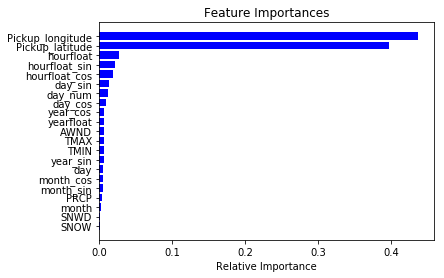

In [363]:
features=X.columns.values
importance=reg2.feature_importances_
indices=np.argsort(importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()